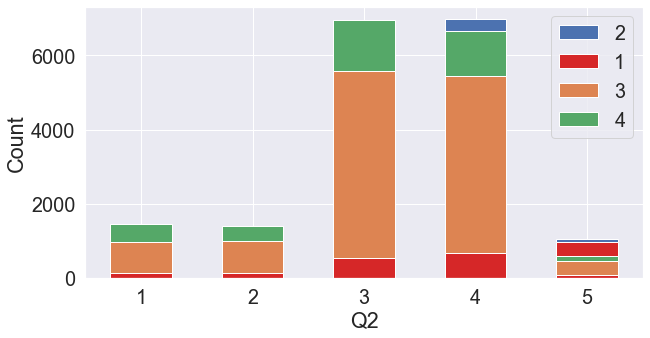

(0.0, 1.0, 0)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import pandas as pd
%matplotlib inline

happy = pd.read_csv('C:/Users/이가은/Desktop/after_EDA/happynot.csv',thousands = ',')
Q1_Q2 = happy[['Q1','Q2']]
Q1_Q2.head()

Q1_Q2['Q1'].value_counts()
Q1_Q2['Q2'].value_counts()

contingency_table = pd.crosstab(Q1_Q2['Q1'],Q1_Q2['Q2'],margins = True)
contingency_table

#Assigns the frequency values
q1_1count = contingency_table.iloc[0][0:5].values
q1_2count = contingency_table.iloc[1][0:5].values
q1_3count = contingency_table.iloc[2][0:5].values
q1_4count = contingency_table.iloc[3][0:5].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["1","2","3","4","5"]
p1 = plt.bar(categories, q1_1count, 0.55, color='#d62728')
p2 = plt.bar(categories, q1_2count, 0.55, bottom=q1_1count)
p3 = plt.bar(categories, q1_3count, 0.55, bottom=q1_2count)
p4 = plt.bar(categories, q1_4count, 0.55, bottom=q1_3count)

plt.legend((p2[0], p1[0], p3[0], p4[0]), ('2', '1', '3','4'))
plt.xlabel('Q2')
plt.ylabel('Count')
plt.show()


f_obs = np.append(contingency_table.iloc[0][0:5].values, contingency_table.iloc[1][0:5].values)
f_obs

from scipy import stats
stats.chi2_contingency(f_obs)[0:3]
# 순서대로 chi-square 통계량, p-value, df

In [2]:
import scipy

In [3]:
#def cramers_v(x, y):
#    confusion_matrix = pd.crosstab(x,y)
#    chi2 = ss.chi2_contingency(confusion_matrix)[0]
#    n = confusion_matrix.sum().sum()
#    phi2 = chi2/n
#    r,k = confusion_matrix.shape
#    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#    rcorr = r-((r-1)**2)/(n-1)
#    kcorr = k-((k-1)**2)/(n-1)
#    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [4]:
def cramers_v(confusion_matrix):
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [5]:
# nominal data
Q1 = happy[['Q1']]
Q2B = happy[['Q2B']]
Q3A1 = happy[['Q3A1']]
Q14A1 = happy[['Q14A1']]
Q14A2 = happy[['Q14A2']]
Q17A1 = happy[['Q17A1']]
Q17A2 = happy[['Q17A2']]
Q18 = happy[['Q18']]
Q19A1 = happy[['Q19A1']]
Q19A2 = happy[['Q19A2']]
Q21B1 = happy[['Q21B1']]
Q21B2 = happy[['Q21B2']]
Q24 = happy[['Q24']]
Q25A1 = happy[['Q25A1']]
Q25A2 = happy[['Q25A2']]
Q26 = happy[['Q26']]
Q31A1 = happy[['Q31A1']]
Q31A2 = happy[['Q31A2']]
Q38 = happy[['Q38']]
Q39 = happy[['Q39']]
Q42 = happy[['Q42']]
Q44 = happy[['Q44']]
Q47C = happy[['Q47C']]

In [6]:
nominal_matrix = pd.concat([Q1,Q2B,Q3A1,Q14A1,Q14A2,Q17A1,Q17A2,Q18,Q19A1,Q19A2,Q21B1,Q21B2,Q24,Q25A1,Q25A2,Q26,Q31A1,Q31A2,Q38,Q39,Q42,Q44,Q47C], axis=1)
nominal_matrix

,Q1,Q2B,Q3A1,Q14A1,Q14A2,Q17A1,Q17A2,Q18,Q19A1,Q19A2,...,Q25A1,Q25A2,Q26,Q31A1,Q31A2,Q38,Q39,Q42,Q44,Q47C
0,1,0.0,1,4,1.0,1,10.0,1,6,10.0,...,2,4.0,0,1,2.0,2,3,1,3,3.0
1,3,4.0,1,1,3.0,1,10.0,2,10,6.0,...,1,2.0,0,1,6.0,2,3,0,3,0.0
2,1,3.0,1,1,7.0,5,6.0,3,8,4.0,...,5,6.0,0,8,5.0,4,3,1,3,3.0
3,1,3.0,1,1,7.0,6,5.0,3,10,3.0,...,6,5.0,0,8,5.0,4,2,1,3,0.0
4,1,3.0,0,3,1.0,5,6.0,3,4,10.0,...,6,5.0,0,5,8.0,4,2,1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31843,1,4.0,1,1,6.0,1,2.0,3,1,2.0,...,1,3.0,0,5,2.0,3,2,0,3,0.0
31844,1,0.0,0,1,6.0,1,10.0,2,6,2.0,...,1,2.0,0,1,5.0,3,3,0,3,0.0
31845,3,0.0,0,6,2.0,1,10.0,2,6,1.0,...,3,1.0,0,8,5.0,3,3,0,3,0.0
31846,4,0.0,1,6,2.0,4,2.0,2,6,2.0,...,2,3.0,0,1,5.0,5,2,1,2,4.0


In [7]:
#cramers_v(nominal_matrix)

In [8]:
#corr = cramer.corr()
#g = sns.heatmap(corr,  vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
#sns.despine()
#g.figure.set_size_inches(14,10)
    
#plt.show()

In [9]:
#cols = ["Party", "Vote", "contrib"]
#corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
#for col1, col2 in itertools.combinations(cols, 2):
#    idx1, idx2 = cols.index(col1), cols.index(col2)
#    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
#    corrM[idx2, idx1] = corrM[idx1, idx2]

#corr = pd.DataFrame(corrM, index=cols, columns=cols)
#fig, ax = plt.subplots(figsize=(7, 6))
#ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables")

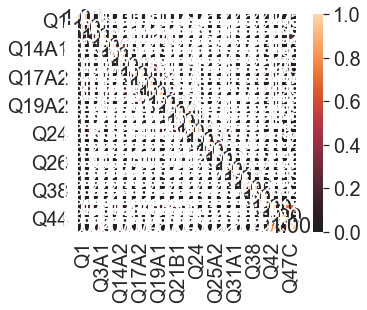

{'corr':              Q1       Q2B      Q3A1     Q14A1     Q14A2     Q17A1     Q17A2  \
 Q1     1.000000  0.092642  0.120071  0.034949  0.027237  0.111035  0.079095   
 Q2B    0.092642  1.000000  0.115868  0.047560  0.050840  0.071087  0.072384   
 Q3A1   0.120071  0.115868  1.000000  0.037182  0.042194  0.166185  0.121039   
 Q14A1  0.034949  0.047560  0.037182  1.000000  0.397937  0.068018  0.040513   
 Q14A2  0.027237  0.050840  0.042194  0.397937  1.000000  0.056112  0.053111   
 Q17A1  0.111035  0.071087  0.166185  0.068018  0.056112  1.000000  0.155607   
 Q17A2  0.079095  0.072384  0.121039  0.040513  0.053111  0.155607  1.000000   
 Q18    0.099203  0.059560  0.166455  0.033651  0.025551  0.157805  0.122795   
 Q19A1  0.099568  0.068059  0.158968  0.060445  0.061480  0.305047  0.119322   
 Q19A2  0.071880  0.060479  0.123106  0.036894  0.047238  0.108913  0.197733   
 Q21B1  0.085908  0.067528  0.063294  0.065269  0.068966  0.083010  0.066080   
 Q21B2  0.071228  0.062358  0.06

In [10]:
import pandas as pd
from dython import nominal

nominal.associations(nominal_matrix, nominal_columns = ['Q1','Q2B','Q3A1','Q14A1','Q14A2','Q17A1','Q17A2','Q18','Q19A1','Q19A2','Q21B1',
                                                        'Q21B2','Q24','Q25A1','Q25A2','Q26','Q31A1','Q31A2','Q38','Q39','Q42','Q44','Q47C'])